In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('F1Score_55-66 - Grouping_Labels(score=0.25).csv')
df.head()
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
# # ds = pd.DataFrame(ct.fit_transform(dataset))
# datatrain = dataset.iloc[:, [4, 8]]
# datavalid = dataset.iloc[:, [5, 9]]
# datatest  = dataset.iloc[:, [6, 10]]

,No Label,No Model,Labels,Dataset,Train_Images,Val_Images,Test_Images,Model,Train_F1,Val_F1,Test_F1
0,1,1,horizontal_white,4,5718,714,714,yolo-v4-57-21042022,0.6953,0.5602,0.5403
1,1,2,horizontal_white,4,5718,714,714,yolo-v4-60-23042022,0.7608,0.5772,0.5462
2,1,3,horizontal_white,6,5718,714,714,yolo-v4-55-21042022,0.6738,0.5377,0.5172
3,1,4,horizontal_white,6,6391,798,798,yolo-v4-59-23042022,0.6749,0.5607,0.5533
4,1,5,horizontal_white,7,1096,137,137,yolo-v4-63-13052022,0.7631,0.5561,0.4679


In [43]:
print(df.head(20).to_string())

    No Label  No Model            Labels  Dataset  Train_Images  Val_Images  Test_Images                Model  Train_F1  Val_F1  Test_F1
0          1         1  horizontal_white        4          5718         714          714  yolo-v4-57-21042022    0.6953  0.5602   0.5403
1          1         2  horizontal_white        4          5718         714          714  yolo-v4-60-23042022    0.7608  0.5772   0.5462
2          1         3  horizontal_white        6          5718         714          714  yolo-v4-55-21042022    0.6738  0.5377   0.5172
3          1         4  horizontal_white        6          6391         798          798  yolo-v4-59-23042022    0.6749  0.5607   0.5533
4          1         5  horizontal_white        7          1096         137          137  yolo-v4-63-13052022    0.7631  0.5561   0.4679
5          1         6  horizontal_white        7           609          75           75  yolo-v4-66-12052022    0.6703  0.6522   0.6119
6          1         7  horizontal_white 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No Label      74 non-null     int64  
 1   No Model      74 non-null     int64  
 2   Labels        74 non-null     object 
 3   Dataset       74 non-null     int64  
 4   Train_Images  74 non-null     int64  
 5   Val_Images    74 non-null     int64  
 6   Test_Images   74 non-null     int64  
 7   Model         74 non-null     object 
 8   Train_F1      74 non-null     float64
 9   Val_F1        74 non-null     float64
 10  Test_F1       74 non-null     float64
dtypes: float64(3), int64(6), object(2)
memory usage: 6.5+ KB


In [45]:
df_train = df[['No Label', 'Labels', 'Dataset',  'Train_Images', 'Model', 'Train_F1']]
df_train_sorted = df_train.sort_values('Train_F1')
df_train_sorted.corr()

,No Label,Dataset,Train_Images,Train_F1
No Label,1.000000,0.306189,-0.629147,-0.396300
Dataset,0.306189,1.000000,-0.115861,-0.299241
Train_Images,-0.629147,-0.115861,1.000000,0.414978
Train_F1,-0.396300,-0.299241,0.414978,1.000000


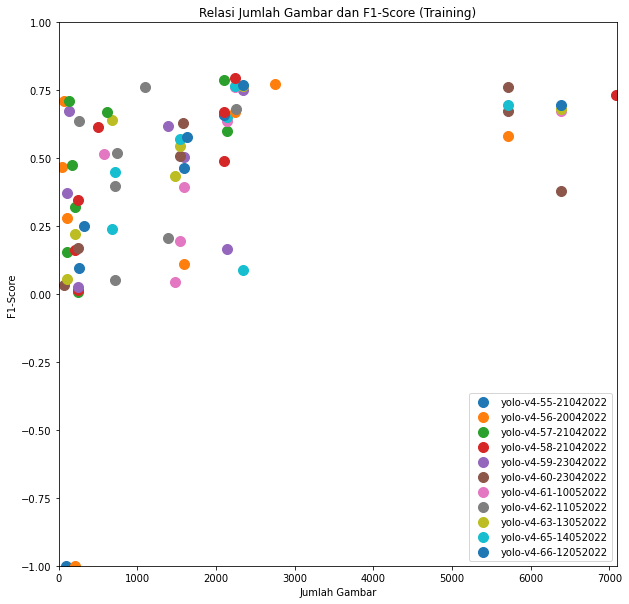

In [46]:
X_df_train_rel = df_train_sorted[['Train_Images', 'Labels']]
X_df_train_imgs = np.asarray(X_df_train_rel[['Train_Images']])
X_df_train_imgs.reshape(-1, 1)

y_df_train_rel = df_train_sorted[['Model', 'Train_F1']]
y_df_train_f1 = np.asarray(y_df_train_rel[['Train_F1']])

# print(y_df_train_f1[0], y_df_train_rel[0])
model_name = np.unique(y_df_train_rel.Model.to_list())
label_name = np.unique(X_df_train_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_train_rel_sc = sc.fit_transform(X_df_train_imgs)
X_set, y_set = sc.inverse_transform(X_df_train_rel_sc), y_df_train_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Training)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_train.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [47]:
print(df_train.Model.str.get_dummies(sep='_').corrwith(df.Train_F1/df.Train_F1.max()))

yolo-v4-55-21042022    0.101920
yolo-v4-56-20042022    0.147345
yolo-v4-57-21042022    0.106925
yolo-v4-58-21042022    0.054210
yolo-v4-59-23042022    0.076112
yolo-v4-60-23042022    0.162475
yolo-v4-61-10052022   -0.416071
yolo-v4-62-11052022    0.022448
yolo-v4-63-13052022    0.173883
yolo-v4-65-14052022   -0.309272
yolo-v4-66-12052022   -0.016150
dtype: float64


In [48]:
df_Val = df[['No Label', 'Labels', 'Dataset', 'Val_Images', 'Model', 'Val_F1']]
df_Val_sorted = df_Val.sort_values('Val_F1')
df_Val.corr()

,No Label,Dataset,Val_Images,Val_F1
No Label,1.000000,0.306189,-0.628756,-0.352006
Dataset,0.306189,1.000000,-0.115831,-0.142396
Val_Images,-0.628756,-0.115831,1.000000,0.430225
Val_F1,-0.352006,-0.142396,0.430225,1.000000


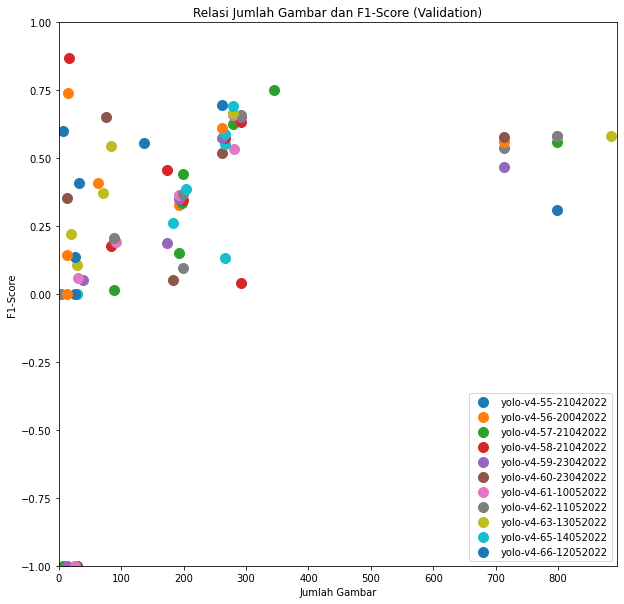

In [50]:
X_df_Val_rel = df_Val_sorted[['Val_Images', 'Labels']]
X_df_Val_imgs = np.asarray(X_df_Val_rel[['Val_Images']])
X_df_Val_imgs.reshape(-1, 1)

y_df_Val_rel = df_Val_sorted[['Model', 'Val_F1']]
y_df_Val_f1 = np.asarray(y_df_Val_rel[['Val_F1']])

# print(y_df_Val_f1[0], y_df_Val_rel[0])
model_name = np.unique(y_df_Val_rel.Model.to_list())
label_name = np.unique(X_df_Val_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_Val_rel_sc = sc.fit_transform(X_df_Val_imgs)
X_set, y_set = sc.inverse_transform(X_df_Val_rel_sc), y_df_Val_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Validation)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_Val.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [51]:
print(df_Val.Model.str.get_dummies(sep='_').corrwith(df.Val_F1/df.Val_F1.max()))

yolo-v4-55-21042022    0.104195
yolo-v4-56-20042022    0.110854
yolo-v4-57-21042022   -0.026098
yolo-v4-58-21042022   -0.018274
yolo-v4-59-23042022    0.006030
yolo-v4-60-23042022    0.134924
yolo-v4-61-10052022   -0.190014
yolo-v4-62-11052022   -0.038047
yolo-v4-63-13052022    0.162507
yolo-v4-65-14052022   -0.122979
yolo-v4-66-12052022   -0.075164
dtype: float64


In [52]:
df_Test = df[['No Label', 'Labels', 'Dataset', 'Test_Images', 'Model', 'Test_F1']]
df_Test_sorted = df_Test.sort_values('Test_F1')
df_Test.corr()

,No Label,Dataset,Test_Images,Test_F1
No Label,1.000000,0.306189,-0.628756,-0.328365
Dataset,0.306189,1.000000,-0.115831,-0.196960
Test_Images,-0.628756,-0.115831,1.000000,0.426938
Test_F1,-0.328365,-0.196960,0.426938,1.000000


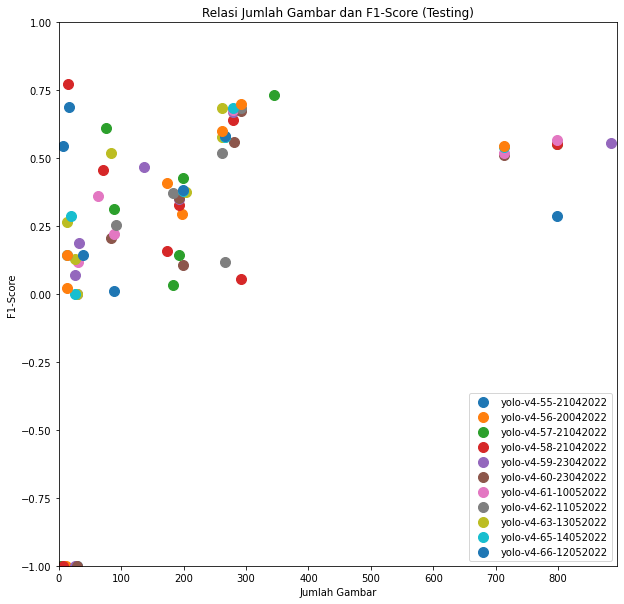

In [54]:
X_df_Test_rel = df_Test_sorted[['Test_Images', 'Labels']]
X_df_Test_imgs = np.asarray(X_df_Test_rel[['Test_Images']])
X_df_Test_imgs.reshape(-1, 1)

y_df_Test_rel = df_Test_sorted[['Model', 'Test_F1']]
y_df_Test_f1 = np.asarray(y_df_Test_rel[['Test_F1']])

# print(y_df_Test_f1[0], y_df_Test_rel[0])
model_name = np.unique(y_df_Test_rel.Model.to_list())
label_name = np.unique(X_df_Test_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_Test_rel_sc = sc.fit_transform(X_df_Test_imgs)
X_set, y_set = sc.inverse_transform(X_df_Test_rel_sc), y_df_Test_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Testing)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_Test.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [40]:
print(df_Test.Model.str.get_dummies(sep='_').corrwith(df.Test_F1/df.Test_F1.max()))

yolo-v4-55-21042022    0.105132
yolo-v4-56-20042022    0.087250
yolo-v4-57-21042022    0.110692
yolo-v4-58-21042022   -0.010406
yolo-v4-59-23042022   -0.005859
yolo-v4-60-23042022    0.132317
yolo-v4-61-10052022   -0.209243
yolo-v4-62-11052022    0.071323
yolo-v4-63-13052022    0.108314
yolo-v4-65-14052022   -0.141134
yolo-v4-66-12052022   -0.174119
dtype: float64
